In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) 
pd.set_option("display.max_rows", None)

model_var = ['Year','HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes', 'HHCar_Yes', 'HousingCost_HighImpactHH',
             'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes','vhRentaa',
             'CHealth','AREMonth', 'CrConditions_NChronic','HLimitations_NoLimited','LifeSatisfaction0','LifeSatisfaction2']


df = pd.read_csv('./Files/ECV_2004_2018.csv.gz', sep = ';', compression='gzip', usecols = model_var).dropna()
df_model = df[(df['Year'] == 2018) | (df['Year'] == 2013)]

df_model.head()

,Year,AREMonth,vhRentaa,CHealth,HHHolidays_Yes,HHFood_Yes,HHReserves_Yes,HHComputer_Yes,HHCar_Yes,HousingCost_HighImpactHH,HousingCost_MediumImpactHH,HHHeath_Yes,vhPobreza_vhPobreza_Yes,vhMATDEP_vhMATDEP_Yes,CrConditions_NChronic,HLimitations_NoLimited,LifeSatisfaction0,LifeSatisfaction2
267835,2013,5.0,88450.00,1.0,1,1,1,1,1,1,0,1,0,0,1,1,8.0,8.000000
267836,2013,5.0,88450.00,2.0,1,1,1,1,1,1,0,1,0,0,1,1,8.0,8.000000
267837,2013,5.0,88450.00,2.0,1,1,1,1,1,1,0,1,0,0,1,1,6.5,6.728170
267838,2013,3.0,30558.69,1.0,0,1,1,1,1,0,1,1,0,0,1,1,8.5,8.540183
267839,2013,3.0,30558.69,2.0,0,1,1,1,1,0,1,1,0,0,1,1,7.5,7.996524


# Librerías

In [2]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Selección de variables
import statsmodels.api as sm

# Hyperparameter tunning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randInt

# Validación 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Variables 

In [3]:
# Variables
X = df_model[['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes', 'HHCar_Yes', 'HousingCost_HighImpactHH',
              'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes','vhRentaa',
              'CrConditions_NChronic','HLimitations_NoLimited','CHealth','AREMonth']]

# variable output con media aritmética
y1 = df_model['LifeSatisfaction0']
# variable output con predominio de variables de satisfacción con la vida
y2 = df_model['LifeSatisfaction2']

(17.0, 0.0)

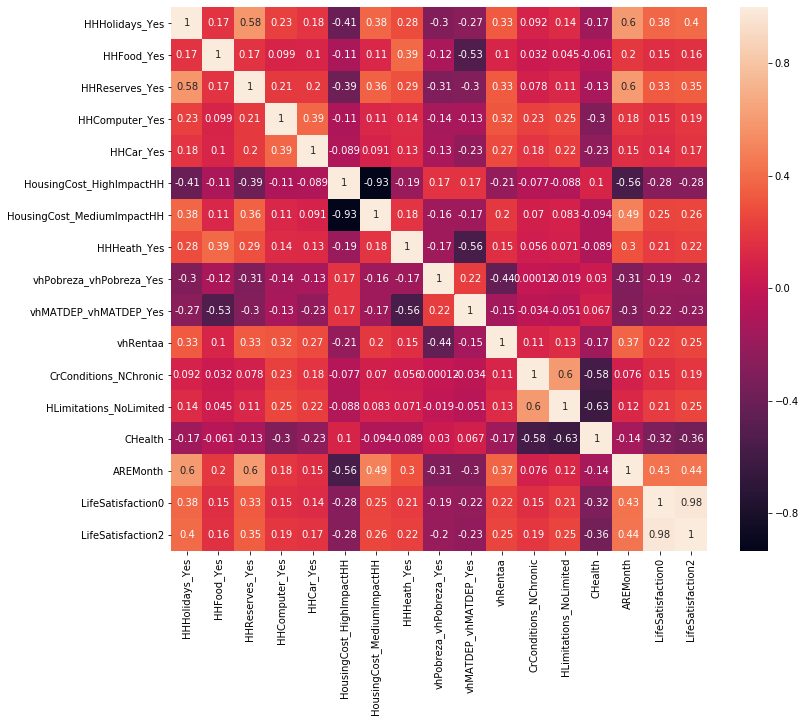

In [9]:
vars_corr = df_model[['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes', 'HHCar_Yes', 'HousingCost_HighImpactHH',
              'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes','vhRentaa',
              'CrConditions_NChronic','HLimitations_NoLimited','CHealth','AREMonth',
                      'LifeSatisfaction0','LifeSatisfaction2']].corr()
#my_chart = sns.heatmap(X_corr,  vmax=1, annot=True, xticklabels=True, yticklabels=True)
plt.figure(figsize=(12,10))
ax = sns.heatmap(vars_corr, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modelos

In [12]:
# Train - Test Split y1
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,y1, test_size = 0.2, random_state = 33)
# Train - Test Split y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 33)

* ### Linear Regression

#### a) Variable y1

In [16]:
counter = 0
for counter in range(len(list(X.columns))):
    print(str(list(X.columns)[counter]) + ': ' + str((list(reg1.coef_))[counter]))
    counter += 1

HHHolidays_Yes: 0.37153304598434617
HHFood_Yes: 0.12541449969662027
HHReserves_Yes: 0.11220204693056866
HHComputer_Yes: -0.09655692099231478
HHCar_Yes: 0.015176371601416558
HousingCost_HighImpactHH: -0.057647285726511684
HousingCost_MediumImpactHH: 0.03170953385904254
HHHeath_Yes: 0.1477217552912567
vhPobreza_vhPobreza_Yes: -0.1347944019675421
vhMATDEP_vhMATDEP_Yes: -0.345643859501148
vhRentaa: 8.621300964795076e-07
CrConditions_NChronic: -0.17414365556608036
HLimitations_NoLimited: 0.04804226523269239
CHealth: -0.4628173287819382
AREMonth: 0.28465288475069694


#### b) Variable y2

In [24]:
# Instancia
reg2 = LinearRegression()
# Fit del modelo
reg2.fit(X_train2, y_train2)
# Predicción de los valores en test
pred2=reg2.predict(X_test2)

* ### Kneighbors

#### a) Variable y1

In [25]:
# Instancia
regk_1 = KNeighborsRegressor(n_neighbors=298)

# Fit del modelo
regk_1.fit(X_train1, y_train1)

# Predicción de los valores en test
predK1=regk_1.predict(X_test1)

#### b) Variable y2

In [26]:
# Instancia
regk_2 = KNeighborsRegressor(n_neighbors=298)

# Fit del modelo
regk_2.fit(X_train2, y_train2)

# Predicción de los valores en test
predk2=regk_2.predict(X_test2)

* ### Decision Tree

#### a) Variable y1

In [27]:
# Instancia
regd_1 = DecisionTreeRegressor(min_samples_split = 6,
                             max_depth = 12,
                             min_samples_leaf = 4)

# Fit del modelo
regd_1.fit(X_train1, y_train1)

# Predicción de los valores en test
predd1=regd_1.predict(X_test1)

#### b) Variable y2

In [28]:
# Instancia
regd_2 = DecisionTreeRegressor(min_samples_split = 6,
                             max_depth = 11,
                             min_samples_leaf = 12)

# Fit del modelo
regd_2.fit(X_train2, y_train2)

# Predicción de los valores en test
predd2=regd_2.predict(X_test2)

* ### Random Forest

#### a) Variable y1

In [29]:
# Instancia
rdfreg1 = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = 30, 
                               min_samples_leaf = 60, 
                               max_depth = 10)
# Fit del modelo
rdfreg1.fit(X_train1, y_train1)

# Predicción de los valores en test
predrdf1=rdfreg1.predict(X_test1)

#### b) Variable y2

In [30]:
rdfreg2 = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = 30, 
                               min_samples_leaf = 60, 
                               max_depth = 10)
# Fit del modelo
rdfreg2.fit(X_train2, y_train2)

# Predicción de los valores en test
predrdf2=rdfreg2.predict(X_test2)

# Resultados

In [31]:
# Regresión Lineal variable 1
print('Resultados Regresión Lineal con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-pred1))))
print('MAE: ' + str(mean_absolute_error(y_test1,pred1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg1.predict((X_test1)),y_test1))))
print('correlation coefficient: ' + str(np.corrcoef(reg1.predict(X_test1), y_test1)[0][1]))
print('R2_score: ' + str(r2_score(y_test1,pred1,multioutput='variance_weighted')))
print('-------------')
# Regresión Lineal variable 2 
print('Resultados Regresión Lineal con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred2))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg2.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg2.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred2,multioutput='variance_weighted')))
print('----------------------------')
print('----------------------------')
# Kneighbors variable 1
print('Resultados Kneighbors con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predK1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predK1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_1.predict((X_test1)),y_test1))))
print('-------------')
# Kneighbors variable 2
print('Resultados Kneighbors con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predk2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predk2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regk_2.predict((X_test2)),y_test2))))
print('----------------------------')
print('----------------------------')
# Decision tree variable 1
print('Resultados Decision Tree con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predd1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predd1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_1.predict((X_test1)),y_test1))))
print('-------------')
# Decision tree variable 2
print('Resultados Decision Tree con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predd2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predd2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(regd_2.predict((X_test2)),y_test2))))
# Random Forest variable 1
print('----------------------------')
print('----------------------------')
print('Resultados Random Forest con variable de Satisfacción 0:')
print('MAPE: ' + str(np.mean(np.abs(y_test1-predrdf1))))
print('MAE: ' + str(mean_absolute_error(y_test1,predrdf1)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg1.predict((X_test1)),y_test1))))
print('-------------')
# Random Forest variable 1
print('Resultados Random Forest con variable de Satisfacción 1:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-predrdf2))))
print('MAE: ' + str(mean_absolute_error(y_test2,predrdf2)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(rdfreg2.predict((X_test2)),y_test2))))

Resultados Regresión Lineal con variable de Satisfacción 0:
MAPE: 0.9865638849308722
MAE: 0.9865638849308732
RMSE: 1.27069016481389
correlation coefficient: 0.5310483664550603
R2_score: 0.28126389047407496
-------------
Resultados Regresión Lineal con variable de Satisfacción 2:
MAPE: 0.9781555415583661
MAE: 0.9781555415583668
RMSE: 1.2707319416569327
correlation coefficient: 0.5648195017266774
R2_score: 0.31841627632611713
----------------------------
----------------------------
Resultados Kneighbors con variable de Satisfacción 0:
MAPE: 1.126348775164632
MAE: 1.126348775164633
RMSE: 1.4490189288398527
-------------
Resultados Kneighbors con variable de Satisfacción 1:
MAPE: 1.1352512101996934
MAE: 1.135251210199695
RMSE: 1.474600701264951
----------------------------
----------------------------
Resultados Decision Tree con variable de Satisfacción 0:
MAPE: 1.0239223160037918
MAE: 1.0239223160037925
RMSE: 1.3181105901421115
-------------
Resultados Decision Tree con variable de Sati

# Feature Selection 

# Hyperparameter tuning

### Kneighbors

##### Kneighbors y1

In [ ]:
%%time
regk1 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk1.fit(X,y1)

print(regk1.best_params_)

##### Kneighbors y2

In [ ]:
%%time
regk2 = GridSearchCV(KNeighborsRegressor(),
                  param_grid={"n_neighbors":np.arange(4,300)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regk2.fit(X,y2)

print(regk2.best_params_)

### Decision Tree

##### Decision Tree y1

In [ ]:
%%time

regd1 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd1.fit(X,y1)

print(regd1.best_params_)

##### Decision Tree y2

In [ ]:
%%time

regd2 = GridSearchCV(DecisionTreeRegressor(),
                  param_grid={"min_samples_split":np.arange(4,15),
                              "max_depth":np.arange(4,15),
                             'min_samples_leaf':np.arange(4,15)},
                  cv=5,
                  scoring="neg_mean_absolute_error")


regd2.fit(X,y2)

print(regd2.best_params_)

### Random Forest

In [16]:
# Hiperparametros
# n_estimators - number of intances - Number of trees
# max_depth: Maximun number of levels in the tree
# min_sample_split: Min number of samples to split a node
# min_sample_leaf: Min number of samples at each leaf node
# min_sample_leaf: Min number of samples at each leaf node
grid_param = {'n_estimators':sp_randInt(30,600), 
              'max_depth':sp_randInt(10,50), 
              'min_samples_split': sp_randInt(20,70),
              'min_samples_leaf':sp_randInt(20,70)}

##### Random Forest y1

In [17]:
%%time

rscv1 = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = grid_param, 
                        n_iter = 50, cv = 5, verbose = 2, random_state = 33, 
                        n_jobs = -1)

rscv1.fit(X,y1)

print(rscv1.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 24.2min finished


{'max_depth': 12, 'min_samples_leaf': 58, 'min_samples_split': 42, 'n_estimators': 201}
CPU times: user 25 s, sys: 1.14 s, total: 26.2 s
Wall time: 24min 37s


##### Random Forest y2

In [19]:
%%time

rscv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = grid_param, 
                        n_iter = 50, cv = 5, verbose = 2, random_state = 33, 
                        n_jobs = -1)

rscv2.fit(X,y2)

print(rscv2.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 26.5min finished


{'max_depth': 12, 'min_samples_leaf': 58, 'min_samples_split': 42, 'n_estimators': 201}
CPU times: user 32.1 s, sys: 1.08 s, total: 33.2 s
Wall time: 26min 59s


# Feature Selection

* Linear regression

In [51]:
#Backward Elimination y2
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y2,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes', 'HHCar_Yes', 'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes', 'vhRentaa', 'CrConditions_NChronic', 'HLimitations_NoLimited', 'CHealth', 'AREMonth']


In [64]:
# Variables X para y 2
X_2BD = ['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes', 'HHCar_Yes', 
         'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 
         'vhMATDEP_vhMATDEP_Yes', 'vhRentaa', 'CrConditions_NChronic', 'HLimitations_NoLimited', 'CHealth', 'AREMonth']
# Train - Test Split y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 33)
# Modelo y 2
reg_2BE = LinearRegression()
# Fit del modelo
reg_2BE.fit(X_train2, y_train2)
# Predicción de los valores en test
pred_2BE= reg_2BE.predict(X_test2)

In [65]:
# Regresión Lineal variable 2 
print('Resultados Regresión Lineal con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred_2BE))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred_2BE)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg_2BE.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg_2BE.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred_2BE,multioutput='variance_weighted')))
print('----------------------------')

Resultados Regresión Lineal con variable de Satisfacción 2:
MAPE: 0.9645836524409365
MAE: 0.9645836524409397
RMSE: 1.2491725674879688
correlation coefficient: 0.5589199732422725
R2_score: 0.31233070455541023
----------------------------


# Revisión de la significación de las variables

* Linear regression

In [62]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X3 = X[['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 'HHComputer_Yes',
       'HHCar_Yes', 'HousingCost_MediumImpactHH',
       'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes',
       'vhRentaa', 
       'CHealth', 'AREMonth']]

X2 = sm.add_constant(X3)
est = sm.OLS(y2, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      LifeSatisfaction2   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     2050.
Date:                Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                        01:53:12   Log-Likelihood:                -87385.
No. Observations:               53227   AIC:                         1.748e+05
Df Residuals:                   53214   BIC:                         1.749e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [59]:
# Variables X para y 2
X_2BD = ['HHHolidays_Yes', 'HHFood_Yes', 'HHReserves_Yes', 
         'HousingCost_MediumImpactHH', 'HHHeath_Yes', 'vhPobreza_vhPobreza_Yes', 'vhMATDEP_vhMATDEP_Yes', 'vhRentaa', 
         'CHealth', 'AREMonth']
# Train - Test Split y2
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,y2, test_size = 0.2, random_state = 33)

# Modelo y 2
reg_2BE = LinearRegression()
# Fit del modelo
reg_2BE.fit(X_train2, y_train2)
# Predicción de los valores en test
pred_2BE= reg_2BE.predict(X_test2)

In [63]:
# Regresión Lineal variable 2 
print('Resultados Regresión Lineal con variable de Satisfacción 2:')
print('MAPE: ' + str(np.mean(np.abs(y_test2-pred_2BE))))
print('MAE: ' + str(mean_absolute_error(y_test2,pred_2BE)))
print('RMSE: ' + str(np.sqrt(mean_squared_error(reg_2BE.predict((X_test2)),y_test2))))
print('correlation coefficient: ' + str(np.corrcoef(reg_2BE.predict(X_test2), y_test2)[0][1]))
print('R2_score: ' + str(r2_score(y_test2,pred_2BE,multioutput='variance_weighted')))
print('----------------------------')

Resultados Regresión Lineal con variable de Satisfacción 2:
MAPE: 0.9645836524409365
MAE: 0.9645836524409397
RMSE: 1.2491725674879688
correlation coefficient: 0.5589199732422725
R2_score: 0.31233070455541023
----------------------------
